In [5]:
%matplotlib notebook 
#Makes plots interactive instead of inline

import numpy as np
import numpy.linalg as nl
import time
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools as itt
import Uncertainty_Tools as UT

In [6]:
KVT=UT.ranger(Increments=200,Max_Dev_Angle=2,AA=True)

Length of each angle scan: 401
Total number of combinations: 160801


Length of each angle scan: 401
Total number of combinations: 160801


<IPython.core.display.Javascript object>


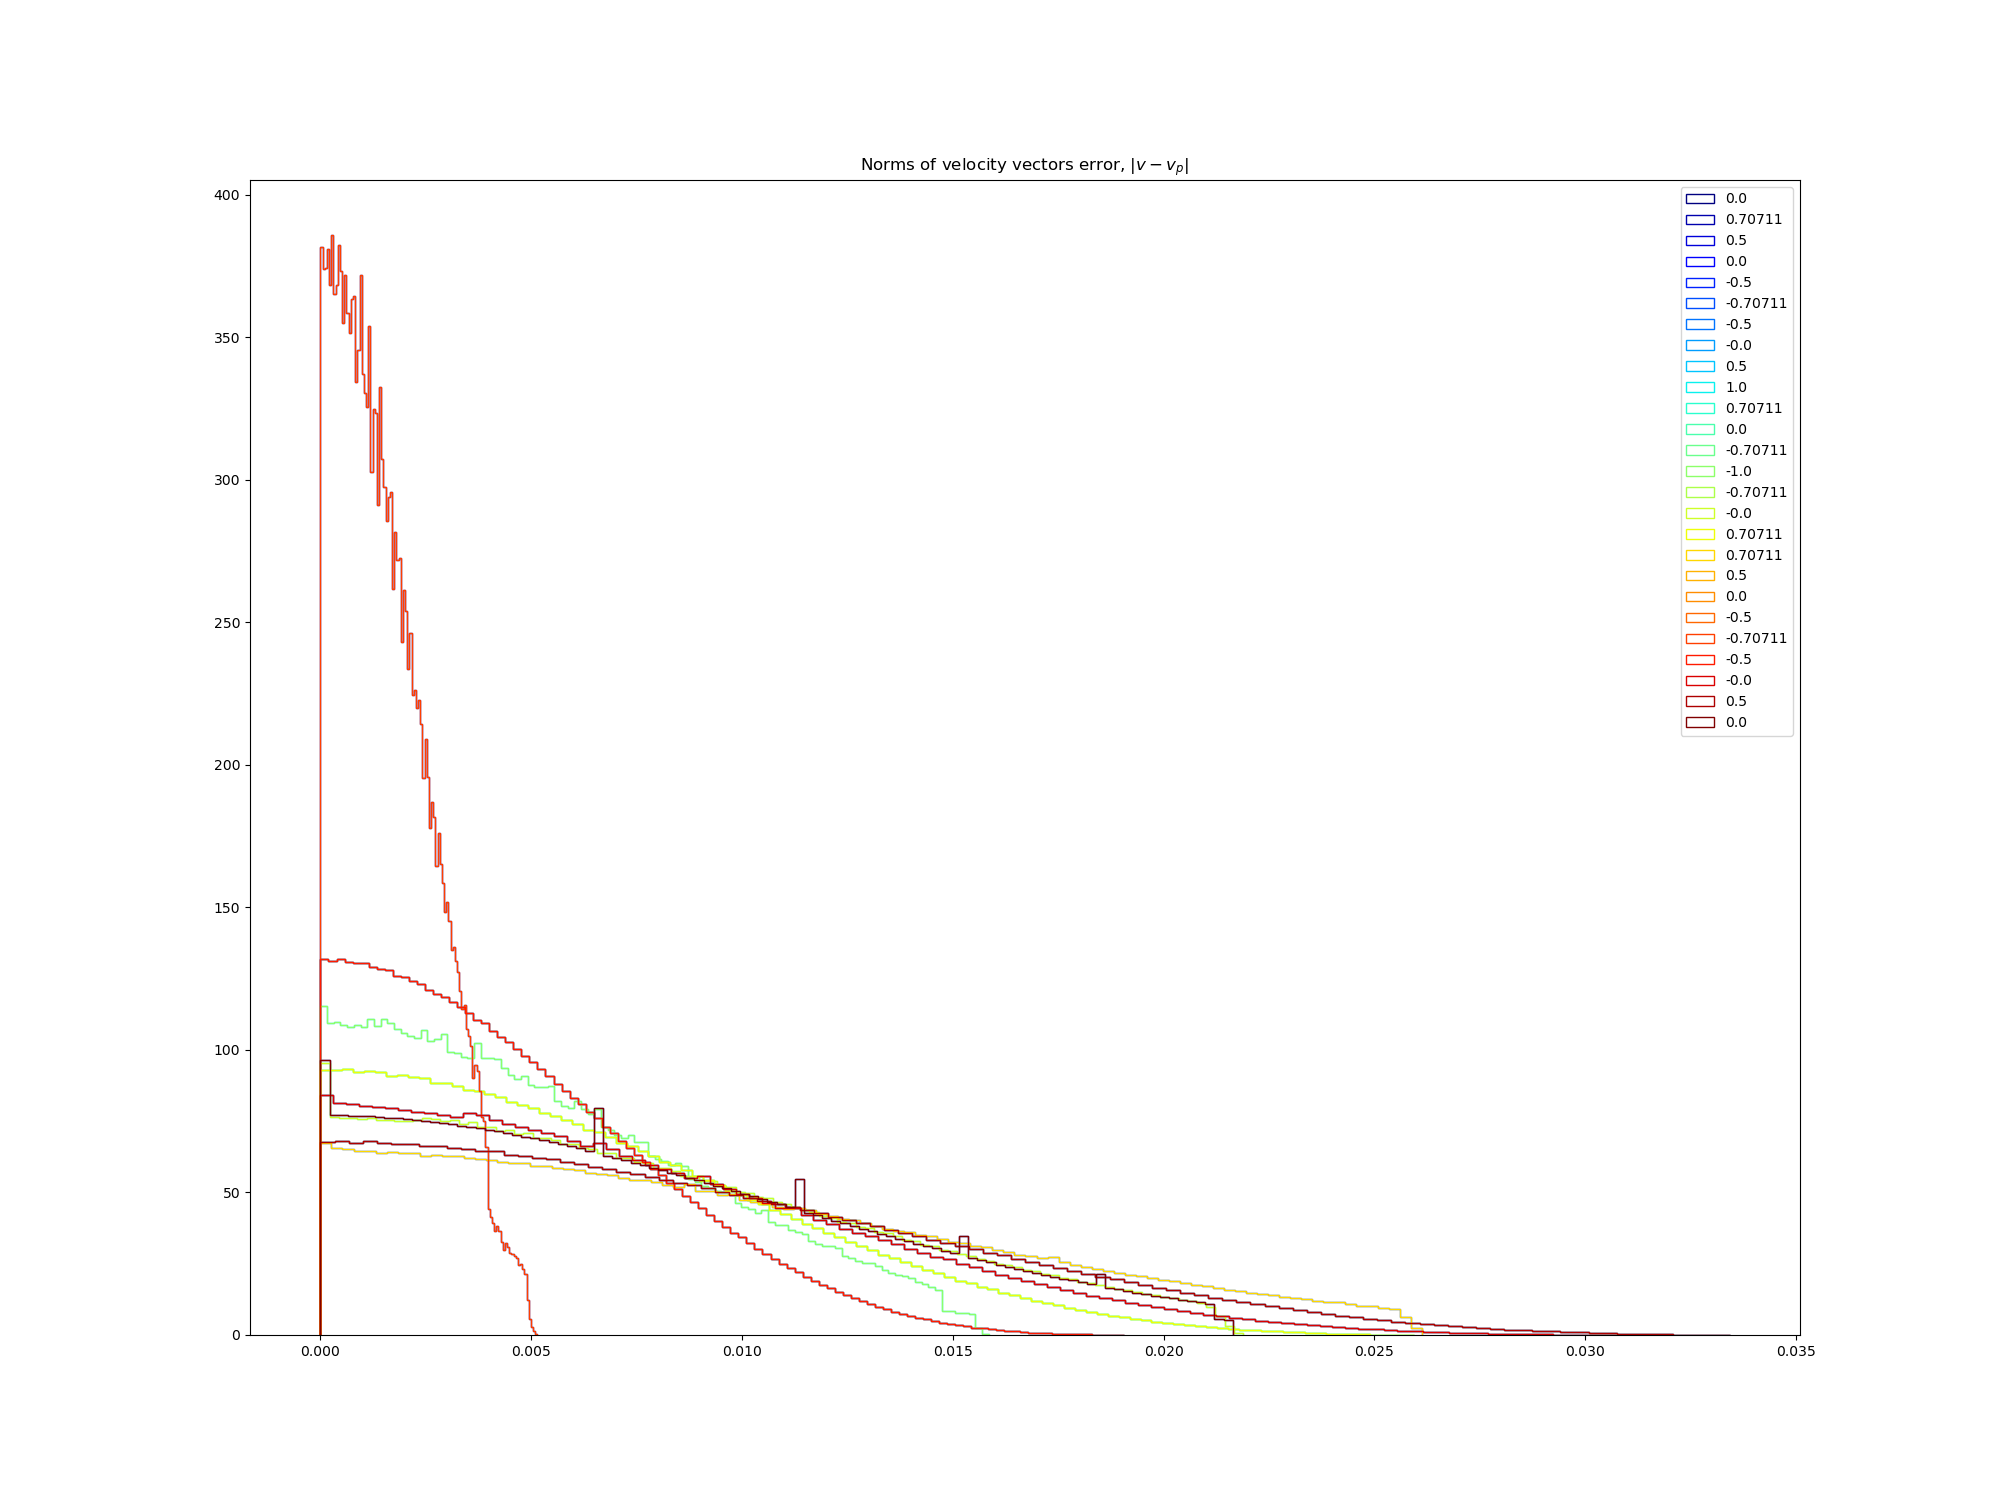

[ 0. -0.  1.]
Number of cores available: 32
160801
160801
0.0 min 10.421953201293945 sec
[0.70711 0.      0.70711]
Number of cores available: 32
160801
160801
0.0 min 10.351081371307373 sec
[0.5     0.5     0.70711]
Number of cores available: 32
160801
160801
0.0 min 10.77431845664978 sec
[0.      0.70711 0.70711]
Number of cores available: 32
160801
160801
0.0 min 10.535542488098145 sec
[-0.5      0.5      0.70711]
Number of cores available: 32
160801
160801
0.0 min 10.604604721069336 sec
[-0.70711  0.       0.70711]
Number of cores available: 32
160801
160801
0.0 min 10.683541297912598 sec
[-0.5     -0.5      0.70711]
Number of cores available: 32
160801
160801
0.0 min 10.470276594161987 sec
[-0.      -0.70711  0.70711]
Number of cores available: 32
160801
160801
0.0 min 10.813184022903442 sec
[ 0.5     -0.5      0.70711]
Number of cores available: 32
160801
160801
0.0 min 10.609848499298096 sec
[1. 0. 0.]
Number of cores available: 32
160801
160801
0.0 min 10.397050142288208 sec
[0.

In [7]:
cmap=mpl.colormaps['jet']

KVT=UT.ranger(Increments=200,Max_Dev_Angle=2,AA=True)

sin = lambda x : np.sin(np.radians(x))
cos = lambda x : np.cos(np.radians(x))

theta_v=np.arange(0,181,45)
phi_v=np.arange(0,360,45)

Vv=[]
HNPAT=[]

V_angle_list=list(itt.product(theta_v,phi_v))

for k in V_angle_list:
    Vv.append(np.array([round(sin(k[0])*cos(k[1]),5),round(sin(k[0])*sin(k[1]),5),round(cos(k[0]),5)]))

Vv=Vv[7:-7] #Removing duplicates for +/- Z velocity vectors. 26 unique velocity vectors total

n_lines=len(Vv)
colors=cmap(np.linspace(0,1,n_lines))

figv,axv=plt.subplots(figsize=[20,15])

for i, v in enumerate(Vv):
    print(v)
    t=time.time()
    VPAT, GPAT = UT.angle_scan_parallel(*KVT, V0=v)
    VNPAT = [nl.norm(i) for i in VPAT]
    
    HN=axv.hist(VNPAT,bins=100,weights=GPAT,density=True,label=v,color=colors[i],histtype='step')
    
    HNPAT.append(HN)
    
    tf=time.time()
    print((tf-t)//60, "min", (tf-t)%60, "sec")
    
axv.set_title('Norms of velocity vectors error, $|v-v_p|$')
axv.legend()

In [4]:
[V_angle_list[n][1]//45 for n in range(len(V_angle_list))][7:-7]

[7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0]

In [9]:
HNPAT

[(array([96.51800824, 77.17388058, 77.10445707, 77.0042889 , 76.87349609,
         76.71223516, 76.52069888, 76.29911585, 76.04775003, 75.76690027,
         75.45689966, 75.11811492, 74.75094564, 74.3558235 , 73.93321146,
         73.48360281, 73.00752024, 72.50551481, 71.97816491, 71.42607511,
         70.84987507, 70.25021828, 69.62778085, 68.98326027, 68.31737406,
         67.63085848, 66.92446718, 66.19896976, 65.4551505 , 64.69380681,
         79.74629908, 62.92045377, 62.10782206, 61.28116952, 60.44133952,
         59.58917976, 58.72554083, 57.85127482, 56.96723397, 56.07426932,
         55.17322934, 54.26495865, 53.35029674, 52.43007672, 51.5051241 ,
         50.57625563, 49.64427813, 48.70998743, 47.77416727, 46.83758831,
         45.90100717, 44.96516548, 54.80539092, 42.86624231, 41.93779131,
         41.01304342, 40.09264839, 39.17723635, 38.26741727, 37.36378043,
         36.46689397, 35.57730455, 34.6955369 , 33.82209362, 32.95745488,
         32.10207824, 31.25639852, 30.

In [16]:
plt.rcParams['axes.titley'] = 1.0
plt.rcParams['axes.titlepad'] = -50

figC, axC = plt.subplots(nrows=5,ncols=8,sharex=True,sharey=True,figsize=[48,30])
chi_params=[]
foldnorm_params=[]

ax_x=[V_angle_list[n][0]//45 for n in range(len(V_angle_list))][7:-7]
ax_y=[V_angle_list[n][1]//45 for n in range(len(V_angle_list))][7:-7]

for i in range(len(HNPAT)):

    Test=stats.rv_histogram(HNPAT[i][:-1])

    x = Test.rvs(size=1000)

    chi_p = stats.chi.fit(x,fdf=1,floc=0)
    foldnorm_p = stats.foldnorm.fit(x,floc=0)

    xx=np.linspace(0,np.max(HNPAT[i][1]),100)

    axC[ax_x[i],ax_y[i]].plot(xx,stats.chi.pdf(xx,chi_p[0],chi_p[1],chi_p[2]),
             label='k=1 Chi distribution, scale={}, loc={}'.format(round(chi_p[2],5),round(chi_p[1],5)))
    
    axC[ax_x[i],ax_y[i]].plot(xx,stats.foldnorm.pdf(xx,foldnorm_p[0],foldnorm_p[1],foldnorm_p[2]),
             label='Folded Norm distribution, c={}, scale={}, loc={}'.format(round(foldnorm_p[0],5),round(foldnorm_p[2],5),round(foldnorm_p[1],5)))
    
    axC[ax_x[i],ax_y[i]].hist(HNPAT[i][1][:-1],bins=100,weights=HNPAT[i][0],histtype='step')

    chi_params.append(chi_p)
    foldnorm_params.append(foldnorm_p)
    
    axC[ax_x[i],ax_y[i]].set_title('V={}; Phi={}, Theta={}'.format(Vv[i],ax_y[i]*45,ax_x[i]*45))
    axC[ax_x[i],ax_y[i]].legend()
    
plt.subplots_adjust(wspace=0,hspace=0)

<IPython.core.display.Javascript object>

In [9]:
chi_params

[(1, 0, 0.00938720703124912),
 (1, 0, 0.0019432067871084887),
 (1, 0, 0.005870056152342868),
 (1, 0, 0.00944213867187412),
 (1, 0, 0.011074829101561622),
 (1, 0, 0.011288452148436622),
 (1, 0, 0.01108703613281162),
 (1, 0, 0.00976867675781162),
 (1, 0, 0.005712890624999117),
 (1, 0, 0.006649780273436618),
 (1, 0, 0.008309936523436617),
 (1, 0, 0.009411621093749122),
 (1, 0, 0.008016967773436617),
 (1, 0, 0.0066131591796866175),
 (1, 0, 0.00807495117187412),
 (1, 0, 0.009332275390624119),
 (1, 0, 0.00809326171874912),
 (1, 0, 0.011462402343749123),
 (1, 0, 0.010763549804686624),
 (1, 0, 0.009078979492186619),
 (1, 0, 0.005935668945311616),
 (1, 0, 0.001958465576170989),
 (1, 0, 0.005706787109374117),
 (1, 0, 0.00921020507812412),
 (1, 0, 0.011218261718749123),
 (1, 0, 0.00942382812499912)]

The **Uncertainty** in the measurement of the ion velocity vector as a result of variations in the probe tip's angular orientation can be interpreted as the **mean** of the distribution of the norm of velocity vector measurement error. This can be back-computed from the fits of the Chi or Folded-Normal distribution functions to the data histograms 

In [10]:
mean_unc=[float(stats.chi.stats(*chi_params[k],moments='m')) for k in range(len(chi_params))]; mean_unc

[0.007489907559293775,
 0.001550454693881204,
 0.004683627175000248,
 0.007533736667248034,
 0.008836435153666288,
 0.009006881684599517,
 0.0088461749554339,
 0.0077942763645316845,
 0.004558227227242228,
 0.005305757012906535,
 0.006630370053301917,
 0.007509387162829002,
 0.006396614810879202,
 0.005276537607603695,
 0.006442878869275366,
 0.007446078451339515,
 0.006457488571926786,
 0.009145673859788005,
 0.008588070208592155,
 0.007243977564661544,
 0.004735978609501167,
 0.0015626294460907204,
 0.004553357326358422,
 0.007348680433663386,
 0.008950877824435743,
 0.007519126964596615]

In [11]:
foldnorm_params

[(0.9191365693271559, 0, 0.006910984511119369),
 (1.0239401295772037, 0, 0.001357934323066587),
 (0.9548983409318678, 0, 0.0042448103527345325),
 (0.8488057497924728, 0, 0.0071994952167840146),
 (0.9305253167993728, 0, 0.008108631696020115),
 (0.9115525196579254, 0, 0.008343721737961647),
 (0.8731237530461837, 0, 0.008350733096954971),
 (0.5033714569275103, 0, 0.008724658517224638),
 (0.7939183177566975, 0, 0.004473916286970659),
 (0.9109438590118086, 0, 0.0049152080631256236),
 (0.8384877117917369, 0, 0.006368786085159426),
 (1.0439313409853364, 0, 0.006510762387691375),
 (0.9039789940224634, 0, 0.005948040714273812),
 (0.9208301606257916, 0, 0.004863772443555594),
 (0.6866111257413734, 0, 0.006657434140137376),
 (0.939011766452313, 0, 0.006803615386557665),
 (0.8413455913720269, 0, 0.00619252643068446),
 (0.9576053421638787, 0, 0.008276919401595351),
 (0.8396815541368594, 0, 0.00824370666712209),
 (0.5102542440582338, 0, 0.008087904942790478),
 (0.9473265001979595, 0, 0.0043101164316

In [12]:
mean_unc_fn=[float(stats.foldnorm.stats(*foldnorm_params[k],moments='m')) for k in range(len(foldnorm_params))]

mean_unc_fn

[0.007692279378452582,
 0.0016065886509722988,
 0.004823548296286754,
 0.007697856604232791,
 0.009084880679971485,
 0.009246491288488612,
 0.009052808183994863,
 0.00782504265596842,
 0.004639095030612499,
 0.005445112913204458,
 0.006770142011759634,
 0.007793920127865766,
 0.006562953491438742,
 0.005418919353608748,
 0.0065169973703342555,
 0.007660280581391552,
 0.006593376202299904,
 0.00942020691866281,
 0.00876910964322729,
 0.007275528889414072,
 0.00487626930861624,
 0.0016093887647005483,
 0.004641958669986967,
 0.007459807890031479,
 0.009026459323054872,
 0.007772936218488302]

<IPython.core.display.Javascript object>


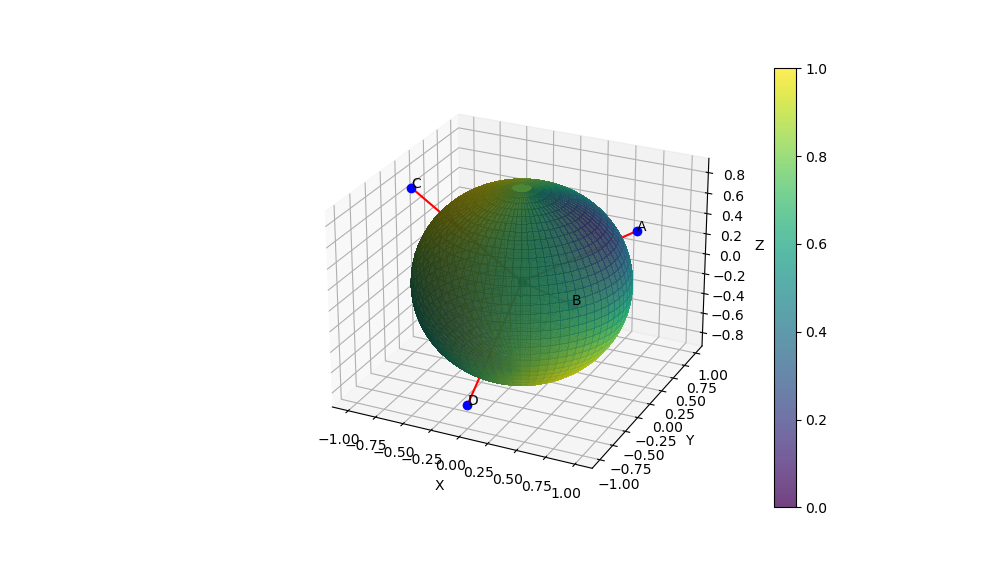

In [14]:
import mpl_toolkits.mplot3d.axes3d as axes3d
from matplotlib import cm
import scipy.interpolate as scip
import polyhedra_3 as p3

#param=np.array([chi_params[k][2] for k in range(len(chi_params))])
param=mean_unc_fn

chi_grid=np.array([param[k] for k in range(1,len(param)-1)])

chi_grid=chi_grid.reshape((3,8))

theta_g=np.arange(45,180,45)

phi_g=np.arange(0,360,45)

#Use scipy.stats RectSphereBivariateSpline to interpolate parameter over surface of sphere

lut=scip.RectSphereBivariateSpline(theta_g*np.pi/180,phi_g*np.pi/180,chi_grid,
                                   pole_values=(param[0],param[-1]))

#Generate spherical rectangular grid

theta=np.arange(0,181,5)
phi=np.arange(0,361,5)

chi_map=lut(theta*np.pi/180,phi*np.pi/180)   #Interpolate parameter data over spherical grid
chi_map=chi_map/chi_map.max()                #Normalize parameter data

#Build spherical map
PHI, THETA = np.meshgrid(phi, theta)
R = 0.9
X = R * cos(PHI) * sin(THETA)
Y = R * sin(PHI) * sin(THETA)
Z = R * cos(THETA)
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')

plot = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1, facecolors=cm.viridis(chi_map),  #Assign interpolated parameter map to colormap
    linewidth=0, antialiased=False, alpha=0.75)

fig.colorbar(plot)

#Plot tetrahedral probe arrangement
Theta_A = np.degrees(np.arctan(np.sqrt(2)))      #Default upper tetrahedral angle (54.7 degrees)
Phi_A = 0                                        #Phi_A default is 0 degrees  
Theta_B = 180-np.degrees(np.arctan(np.sqrt(2)))  #Default lower tetrahedral angle (125.3 degrees)
Phi_B = 90                                       #Phi_B default is 90 degrees
Theta_C = np.degrees(np.arctan(np.sqrt(2)))      #Default upper tetrahedral angle (54.7 degrees)
Phi_C = 180                                      #Phi_C default is 180 degrees
Theta_D = 180-np.degrees(np.arctan(np.sqrt(2)))  #Default lower tetrahedral angle (125.3 degrees)
Phi_D = 270     

rr = p3.vertices('tetrahedron')
#re = p3.fill_edges(rr,vtype='tetrahedron',test=True)
ax.plot([0,rr[:,0][0]],[0,rr[:,0][1]],[0,rr[:,0][2]],'r-')
ax.plot([0,rr[:,1][0]],[0,rr[:,1][1]],[0,rr[:,1][2]],'r-')
ax.plot([0,rr[:,2][0]],[0,rr[:,2][1]],[0,rr[:,2][2]],'r-')
plt.plot([0,rr[:,3][0]],[0,rr[:,3][1]],[0,rr[:,3][2]],'r-')

ax.text(*rr[:,0],'A')
ax.text(*rr[:,1],'B')
ax.text(*rr[:,2],'C')
ax.text(*rr[:,3],'D')

ax.plot(*rr,'ob')
ax.plot(0,0,0,'ok')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(elev=30, azim=300)
plt.show()

In [249]:
lut(100*np.pi/180,155*np.pi/180)

array([[0.00523029]])

In [257]:
KAC2=UT.ranger(Increments=22,Max_Dev_Angle=2,AA=True,CC=True)

sin = lambda x : np.sin(np.radians(x))
cos = lambda x : np.cos(np.radians(x))

theta_v=np.arange(0,181,45)
phi_v=np.arange(0,360,45)

Vv=[]
HNAC2=[]

V_angle_list=list(itt.product(theta_v,phi_v))

for k in V_angle_list:
    Vv.append(np.array([round(sin(k[0])*cos(k[1]),5),round(sin(k[0])*sin(k[1]),5),round(cos(k[0]),5)]))

Vv=Vv[7:-7] #Removing duplicates for +/- Z velocity vectors. 26 unique velocity vectors total

for i, v in enumerate(Vv):
    print(v)
    t=time.time()
    VAC2, GAC2 = UT.angle_scan_parallel(*KAC2, V0=v)
    
    VNAC2 = [nl.norm(i) for i in VAC2]
    
    HNAC2.append(np.histogram(VNAC2,bins=500,weights=GAC2,density=True))
    
    tf=time.time()
    print((tf-t)//60, "min", (tf-t)%60, "sec")

%store HNAC2 

Length of each angle scan: 45
Total number of combinations: 4100625
WARNING! MANY COMBINATIONS!
[ 0. -0.  1.]
Number of cores available: 32
4100625
4100625
4.0 min 0.8848004341125488 sec
[0.70711 0.      0.70711]
Number of cores available: 32
4100625
4100625
4.0 min 0.9135394096374512 sec
[0.5     0.5     0.70711]
Number of cores available: 32
4100625
4100625
6.0 min 50.41780614852905 sec
[0.      0.70711 0.70711]
Number of cores available: 32
4100625
4100625
7.0 min 32.49441313743591 sec
[-0.5      0.5      0.70711]
Number of cores available: 32
4100625
4100625
7.0 min 33.199150800704956 sec
[-0.70711  0.       0.70711]
Number of cores available: 32
4100625
4100625
8.0 min 22.904077291488647 sec
[-0.5     -0.5      0.70711]
Number of cores available: 32
4100625
4100625
8.0 min 7.697862386703491 sec
[-0.      -0.70711  0.70711]
Number of cores available: 32
4100625
4100625
8.0 min 13.779754877090454 sec
[ 0.5     -0.5      0.70711]
Number of cores available: 32
4100625
4100625
7.0 min 

In [265]:
plt.rcParams['axes.titley'] = 1.0
plt.rcParams['axes.titlepad'] = -50

figC, axC = plt.subplots(nrows=5,ncols=8,sharex=True,sharey=True,figsize=[48,30])
chi_params2=[]

ax_x=[V_angle_list[n][0]//45 for n in range(len(V_angle_list))][7:-7]
ax_y=[V_angle_list[n][1]//45 for n in range(len(V_angle_list))][7:-7]

for i in range(len(HNAC2)):

    Test=stats.rv_histogram(HNAC2[i])

    x = Test.rvs(size=1000)

    chi_p2 = stats.chi.fit(x,fdf=2,floc=0) #Fix k=2 and location to 0

    xx=np.linspace(0,np.max(HNAC2[i][1]),100)

    axC[ax_x[i],ax_y[i]].plot(xx,stats.chi.pdf(xx,chi_p2[0],chi_p2[1],chi_p2[2]),
             label='k=1 Chi distribution, scale={}, loc={}'.format(round(chi_p2[2],5),round(chi_p2[1],5)))
       
    axC[ax_x[i],ax_y[i]].hist(HNAC2[i][1][:-1],bins=500,weights=HNAC2[i][0],histtype='step')

    chi_params2.append(chi_p2)
    
    axC[ax_x[i],ax_y[i]].set_title('V={}\nPhi={}, Theta={}'.format(Vv[i],ax_y[i]*45,ax_x[i]*45))
    axC[ax_x[i],ax_y[i]].legend()
    
plt.subplots_adjust(wspace=0,hspace=0)

In [266]:
chi_params2

[(2, 0, 0.00957031249999912),
 (2, 0, 0.008328247070311618),
 (2, 0, 0.008758544921874119),
 (2, 0, 0.009426879882811622),
 (2, 0, 0.008795166015624118),
 (2, 0, 0.008178710937499119),
 (2, 0, 0.00912628173828037),
 (2, 0, 0.00942382812499912),
 (2, 0, 0.008908081054686622),
 (2, 0, 0.006703186035155368),
 (2, 0, 0.00819702148437412),
 (2, 0, 0.009515380859374119),
 (2, 0, 0.00838165283203037),
 (2, 0, 0.006875610351561617),
 (2, 0, 0.00822143554687412),
 (2, 0, 0.00939941406249912),
 (2, 0, 0.00838317871093662),
 (2, 0, 0.00809783935546787),
 (2, 0, 0.00884094238281162),
 (2, 0, 0.00953979492187412),
 (2, 0, 0.00888366699218662),
 (2, 0, 0.00809631347656162),
 (2, 0, 0.008605957031249119),
 (2, 0, 0.009457397460936618),
 (2, 0, 0.009057617187499119),
 (2, 0, 0.00965270996093662)]

In [267]:
mean_unc2=[float(stats.chi.stats(*chi_params2[k],moments='m')) for k in range(len(chi_params2))]; mean_unc2

[0.011994607954776146,
 0.010437909792277949,
 0.010977208172897717,
 0.011814841827902892,
 0.011023105907418548,
 0.010250494042984556,
 0.011438097923711067,
 0.011811017016692823,
 0.011164623922191115,
 0.008401197822916059,
 0.010273442910244972,
 0.011925761352994899,
 0.010504843988454164,
 0.008617299656284973,
 0.010304041399925527,
 0.011780418527012268,
 0.010506756394059198,
 0.01014913654591772,
 0.01108047807556959,
 0.011956359842675453,
 0.01113402543251056,
 0.010147224140312687,
 0.010785967612394254,
 0.01185308994000358,
 0.011352039671484506,
 0.012097877857448019]

In [277]:
#param=np.array([chi_params2[k][2] for k in range(len(chi_params2))])
param=mean_unc2

chi_grid=np.array([param[k] for k in range(1,len(param)-1)])

chi_grid=chi_grid.reshape((3,8))

theta_g=np.arange(45,180,45)

phi_g=np.arange(0,360,45)

#Use scipy.stats RectSphereBivariateSpline to interpolate parameter over surface of sphere

lut2=scip.RectSphereBivariateSpline(theta_g*np.pi/180,phi_g*np.pi/180,chi_grid,
                                   pole_values=(param[0],param[-1]))

#Generate spherical rectangular grid

theta=np.arange(0,181,5)
phi=np.arange(0,361,5)

chi_map=lut2(theta*np.pi/180,phi*np.pi/180)   #Interpolate parameter data over spherical grid
chi_map=chi_map/chi_map.max()                #Normalize parameter data

#Build spherical map
PHI, THETA = np.meshgrid(phi, theta)
R = 0.9
X = R * cos(PHI) * sin(THETA)
Y = R * sin(PHI) * sin(THETA)
Z = R * cos(THETA)
fig = plt.figure(figsize=[20,15])
ax = fig.add_subplot(1,1,1, projection='3d')

plot = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1, facecolors=cm.viridis(chi_map),  #Assign interpolated parameter map to colormap
    linewidth=0, antialiased=False, alpha=0.75)

fig.colorbar(plot)

#Plot tetrahedral probe arrangement
Theta_A = np.degrees(np.arctan(np.sqrt(2)))      #Default upper tetrahedral angle (54.7 degrees)
Phi_A = 0                                        #Phi_A default is 0 degrees  
Theta_B = 180-np.degrees(np.arctan(np.sqrt(2)))  #Default lower tetrahedral angle (125.3 degrees)
Phi_B = 90                                       #Phi_B default is 90 degrees
Theta_C = np.degrees(np.arctan(np.sqrt(2)))      #Default upper tetrahedral angle (54.7 degrees)
Phi_C = 180                                      #Phi_C default is 180 degrees
Theta_D = 180-np.degrees(np.arctan(np.sqrt(2)))  #Default lower tetrahedral angle (125.3 degrees)
Phi_D = 270     

rr = p3.vertices('tetrahedron')
#re = p3.fill_edges(rr,vtype='tetrahedron',test=True)
ax.plot([0,rr[:,0][0]],[0,rr[:,0][1]],[0,rr[:,0][2]],'r-')
ax.plot([0,rr[:,1][0]],[0,rr[:,1][1]],[0,rr[:,1][2]],'r-')
ax.plot([0,rr[:,2][0]],[0,rr[:,2][1]],[0,rr[:,2][2]],'r-')
plt.plot([0,rr[:,3][0]],[0,rr[:,3][1]],[0,rr[:,3][2]],'r-')

ax.text(*rr[:,0],'A')
ax.text(*rr[:,1],'B')
ax.text(*rr[:,2],'C')
ax.text(*rr[:,3],'D')

ax.plot(*rr,'ob')
ax.plot(0,0,0,'ok')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(elev=30, azim=300)
plt.show()